# Logistics regression assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import statsmodels.api as sm
from sklearn import metrics
import scikitplot
data = sm.datasets.fair.load_pandas().data


In [2]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
data['affairs'] = [1 if x >= 1 else 0 for x in data['affairs']]

In [4]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [5]:
data.shape

(6366, 9)

In [6]:
data.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs              int64
dtype: object

In [7]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [8]:
data['affairs'].value_counts()

0    5247
1    1119
Name: affairs, dtype: int64

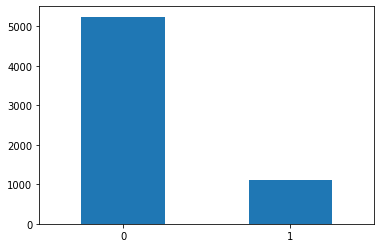

In [9]:
count_classes = pd.value_counts(data['affairs'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.show()

# Data set is not balanced based on output

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.961430,1.0,4.0,4.0,5.0,5.0
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.0,42.0
yrs_married,6366.0,9.009425,7.280120,0.5,2.5,6.0,16.5,23.0
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.0,5.5
religious,6366.0,2.426170,0.878369,1.0,2.0,2.0,3.0,4.0
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.0,20.0
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.0,6.0
occupation_husb,6366.0,3.850141,1.346435,1.0,3.0,4.0,5.0,6.0
affairs,6366.0,0.175778,0.380661,0.0,0.0,0.0,0.0,1.0


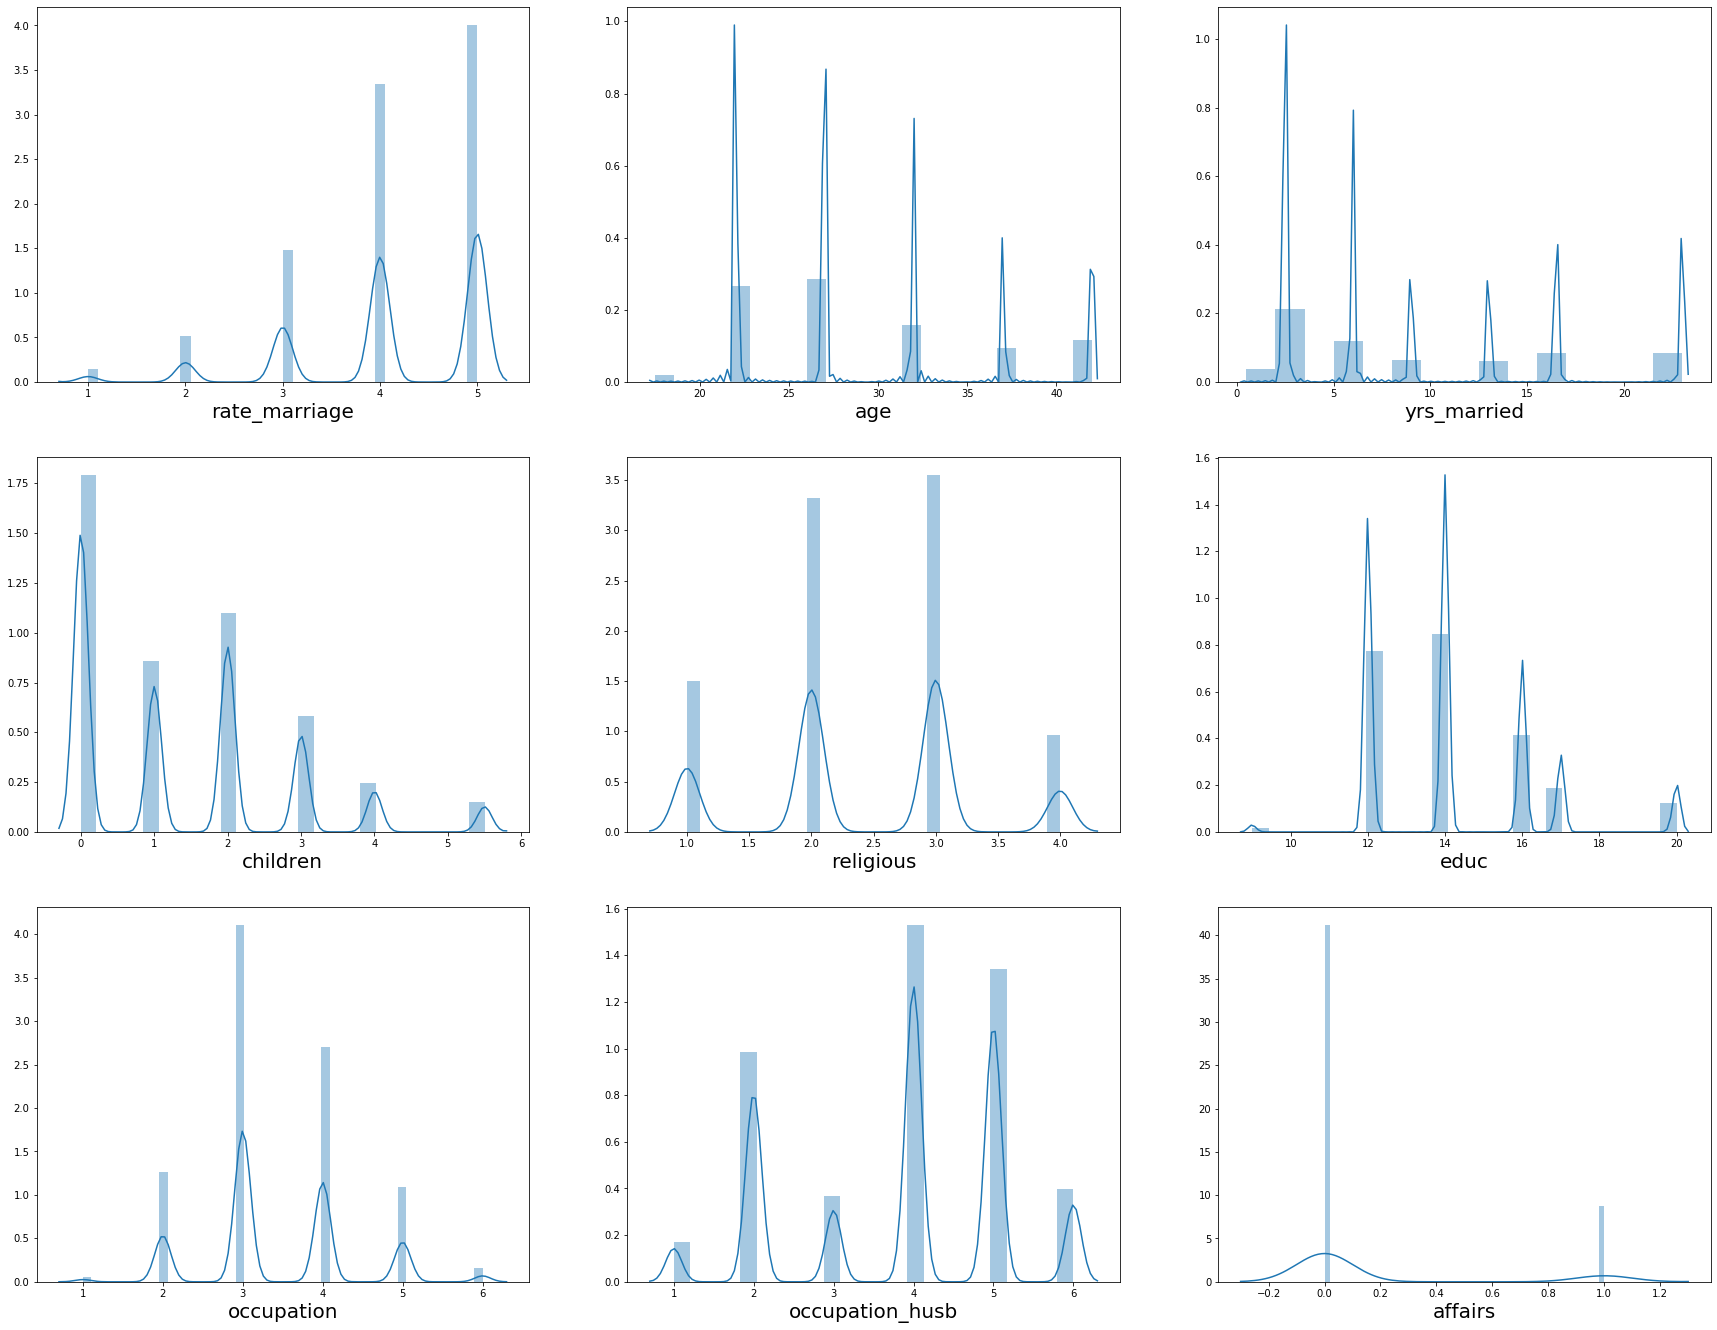

In [11]:
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

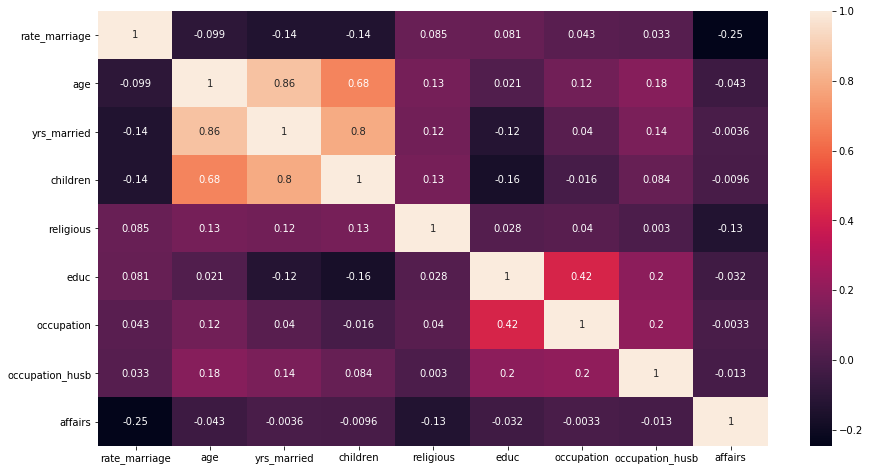

In [12]:
# Check the multicollinearity factor

corr = data.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

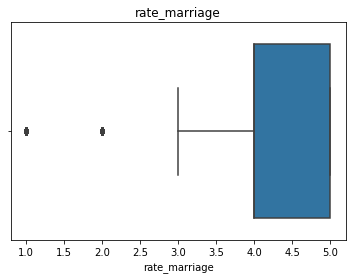

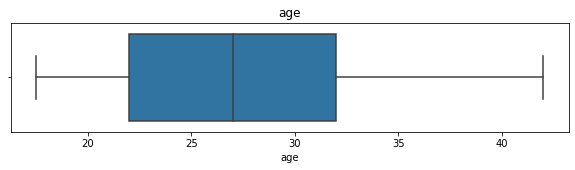

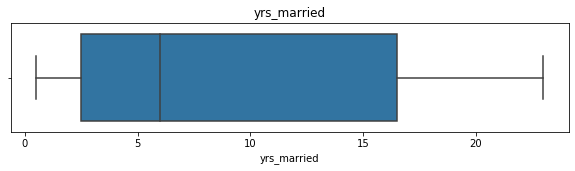

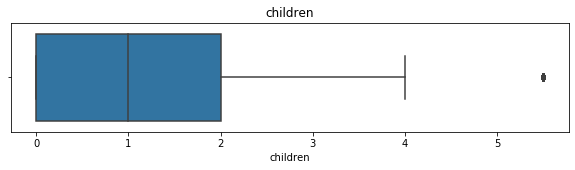

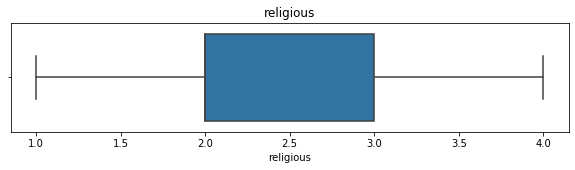

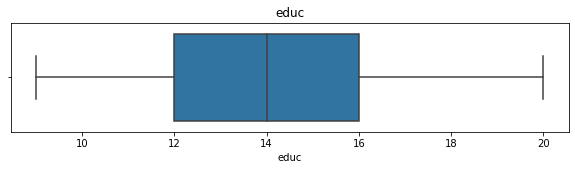

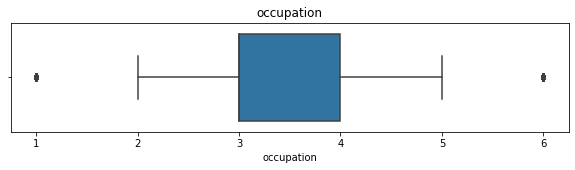

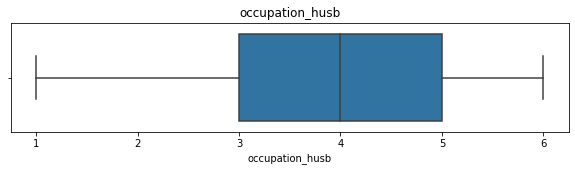

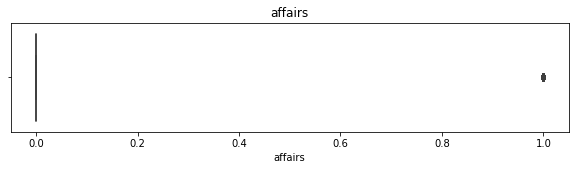

<Figure size 720x144 with 0 Axes>

In [13]:
# decting outliers

for column in data:
    df = data.copy()
    sns.boxplot(df[column])
    plt.title(column)
    plt.figure(figsize=(10,2))

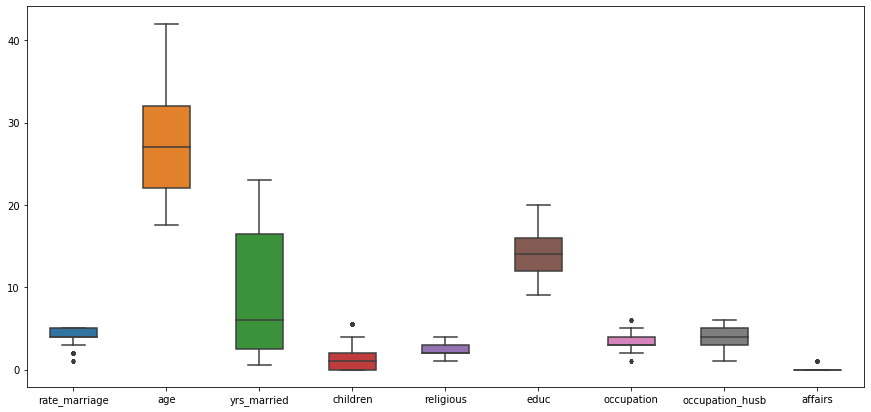

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [15]:
# # Correlation with target(affairs)

# data.drop('affairs', axis=1).corrwith(data.affairs).plot(kind='bar', grid=True, figsize=(15, 5), 
#                                                    title="Correlation with Affairs")

In [16]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


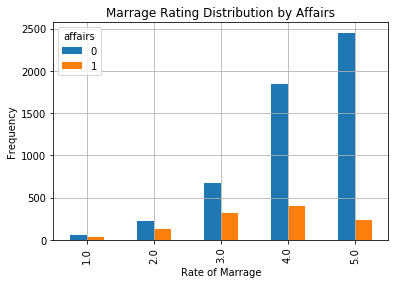

In [17]:
# sns.countplot(x='rate_marriage', data=data, hue='affairs' )

pd.crosstab(data['rate_marriage'], data['affairs']).plot(kind='bar')
plt.title("Marrage Rating Distribution by Affairs")
plt.xlabel("Rate of Marrage")
plt.ylabel("Frequency")
plt.grid()
plt.show()

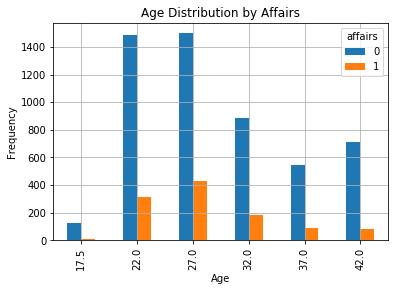

In [18]:
pd.crosstab(data['age'], data['affairs']).plot(kind='bar')
plt.title("Age Distribution by Affairs")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [19]:
# pd.crosstab(data['yrs_married'], data['affairs']).plot(kind='bar')
# plt.title("Years of married Distribution by Affairs")
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.grid()
# plt.show()

In [20]:
# pd.crosstab(data['children'], data['affairs']).plot(kind='bar')
# plt.title("Children Distribution by Affairs")
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.grid()
# plt.show()

In [21]:
# pd.crosstab(data['religious'], data['affairs']).plot(kind='bar')
# plt.title("Religious Distribution by Affairs")
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.grid()
# plt.show()

In [22]:
# pd.crosstab(data['educ'], data['affairs']).plot(kind='bar')
# plt.title("Education Distribution by Affairs")
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.grid()
# plt.show()

In [23]:
# pd.crosstab(data['occupation'], data['affairs']).plot(kind='bar')
# plt.title("Occupation Distribution by Affairs")
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.grid()
# plt.show()

In [24]:
# pd.crosstab(data['occupation_husb'], data['affairs']).plot(kind='bar')
# plt.title("Occupation Husband Distribution by Affairs")
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.grid()
# plt.show()

In [25]:
Y = data['affairs']
X = data.drop('affairs', axis=1)

In [26]:
X.shape

(6366, 8)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state = 150)

logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Based on Train Data:

y_pred_train = logistic.predict(x_train)
print("Confusion_matrix: \n",confusion_matrix(y_train, y_pred_train), '\n')
print("Accuracy_score: ", accuracy_score(y_train, y_pred_train), '\n')
print("classification_report: \n\n", classification_report(y_train, y_pred_train))

Confusion_matrix: 
 [[3864   53]
 [ 806   51]] 

Accuracy_score:  0.8200670297444491 

classification_report: 

               precision    recall  f1-score   support

           0       0.83      0.99      0.90      3917
           1       0.49      0.06      0.11       857

    accuracy                           0.82      4774
   macro avg       0.66      0.52      0.50      4774
weighted avg       0.77      0.82      0.76      4774



In [29]:
# Based on Test Data:

y_pred_test = logistic.predict(x_test)
print("Confusion_matrix: \n",confusion_matrix(y_test, y_pred_test), '\n')
print("Accuracy_score: ", accuracy_score(y_test, y_pred_test), '\n')
print("classification_report: \n\n", classification_report(y_test, y_pred_test))

Confusion_matrix: 
 [[1313   17]
 [ 247   15]] 

Accuracy_score:  0.8341708542713567 

classification_report: 

               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1330
           1       0.47      0.06      0.10       262

    accuracy                           0.83      1592
   macro avg       0.66      0.52      0.51      1592
weighted avg       0.78      0.83      0.78      1592



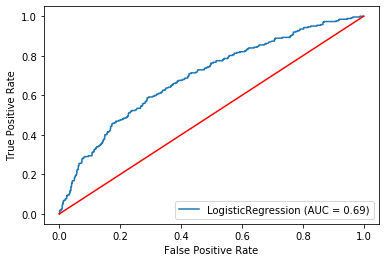

In [30]:
metrics.plot_roc_curve(logistic, x_test, y_test)
metrics.roc_auc_score(y_test, y_pred_test, average=None)
plt.plot([0, 1], [0, 1], '-r')
plt.show()

In [31]:
# Evaluate the model based on k-fold cross_validation

crossVal = cross_val_score(logistic, X, Y, cv=10)
crossVal

array([0.78021978, 0.78806907, 0.82731554, 0.82417582, 0.82731554,
       0.82103611, 0.82861635, 0.83176101, 0.82861635, 0.8254717 ])

In [32]:
crossVal.mean()

0.8182597276936899

In [33]:
# Final Model is:

pred = logistic.predict([[3, 32, 9, 3, 3, 17, 2, 5]])
pred

array([0], dtype=int64)